In [9]:
# data classes
import pandas as pd

from analz.utils.wv_data_2025_utils import WVGDP_2025, DATA2025, WvEmp, WvSummary
from analz.utils.wv_data_utils import WV_GDP, RealGDP, EmployByIndustry as EBI, CompGDP as Comp, CurrGDP, GDPMgr, LCX, IndDescription as ID
from analz.utils.wv_data_utils import TaxesGDP as Tax, TaxesS as Taxs, OppsGDP as Opps, SubsGDP as Subs
from analz.utils.gdp_linked_list import Node, DLL
from analz.utils.GDPTree import TNode, TNTree, TupsDict
from analz.utils.WV2022_graphs import OppSurp, Utils, DCLs, Tups, WBars, TaxSubsBars as TSBars

# types
from collections import namedtuple
import datetime

# graphics

import plotly.express as px
import plotly.figure_factory as ff
from dash import Dash, dcc, html, Input, Output
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# custom global data

GIndex = namedtuple('GIndex', ['id', 'level'])
concord_file = "json/gdp_emp_desc_index_concordance.txt"
pd.set_option("mode.copy_on_write", True)

D:\python_apps\marimo1\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


len of longs: 28


In [10]:
opps = OppSurp()


wbars = WBars()
curr_df = wbars.curr_df  #  23 rows
real_gdp = wbars.rdf
real_gdp_taxable = wbars.rdf_taxable
tsbars = TSBars()

## West Virginia Political Economy
### An Introduction, with charts!

The classic "Economists" the late 18th through the 19th century strove to raise "Economics" to a more scientific discipline from its informal beginnings. These "natural philosophers", inspired by Isaac Newton and other early giants, saw their subject-matter not only as emerging market mechanics and dynamics, fascinating as they are, but as an historical, political and social science. This urgent interest in new economies and their "laws" is not surprising when one considers the immense revolutionary impact the new "capitalist", economic forms and actvities were having on feudal and ancient social relations.

John Stuart Mill, Adam Smith, David Recardo, and Karl Marx all wer motivated by deep concerns with the *relationships* between capitalist economic structures and society at large.

Partnerships, limited liability firms, joint stock enterprises, companies, corporations, banks, paper and metal forms of money and property --- require supply chains, infrastuctures, and  available workforces, where new social and public institutions and relations are required.

Social classes wwere formed and transformed by the new divisions of labor and wealth. Land began to recede as the chief form of wealth. Further, the "republican" and "democratic" cultural and political fervors unleashed by the breakdown of feudal relations exploded across the world upending politics, religion (an integral part of the feudal states) and political institutions everywhere. Economics was born as "political economy".

Driven by the mounting evidence that US monopoly capitalist institutions are looking as twisted, broken and unfixable (by their own efforts) as the ancient feudal and enslaved ones, "political economy" is being reborn.

This review focuses on West Virginia *production*, or,  or the **supply side** of the supply/demand divide more than the **consumer** side of economics. As such, it gives a more "structural" view of a state's economy,  and outlines the available paths toward any political change that contemplates significant advances in standards of living, including abolishing poverty.


The demand side of economics tends to dominate modern economics news. This not unreasonable considering that consumer purchases constitute the biggest share of the US economy, and the amount of available consumer data is vast, so vast as to become "data lakes" or "data oceans" a womb of sorts pregnant with generative AI, a consumer -- and producer.

However, over-emphasizing the consumer side can obscure or undervalue the over riding class and other social, legal and political consequences of shifts in the mode and means of production. The supply chains of commodities and services now thread the entire world. For example, [Bloomberg reports](https://www.bloomberg.com/news/articles/2010-09-09/the-man-who-makes-your-iphone?sref=woWS9Szx) a million workers in over 40 countries are part of the production of an iPhone now.

"DEMAND" asks different questions from those that arise if the starting point is the "capacity to PRODUCE" more useful products or services than one needs for themselves. From a Demand, or Consumer standpoint, primitive, even pre-capitalist markets and advanced capitalist market exchanges may share some similar *appearances*. But from a production, supply side they are universes apart.
   

### The Data Components of West Virginia Production -- and Gross Domestic Product

The components of [regional production and income tracked by the Bureau of Economic Analysis](https://www.bea.gov/itable/regional-gdp-and-personal-income) include:

* the classification of the different branches of the economy, including public, private, production, and service dimensions.
* sufficient data
* the returns to capital (profit, rent, interest)
* the returns to compensation (wages, salaries, benefits)
* what is taxable
* unlawful and lawful trade -- not captured in BEA tables.
* what is subsidized
* degrees of market power (including monopoly),
* A special "supply-side" issue is the supply and reproduction of the human wage and salary earning workforce.

Production economic relationships decisively shape politics. One form of property consideration or another dominates legislative, executive and judicial agendas and dockets.

Industrial policy guides both taxation and subsidies for industry, and a very large legal and  employment framework to accommodate the division and redivision of work and capital as economic development requires.

## West Virginia Production

West Virginia is a poor state, judged by the incomes of its people. We are near the bottom rank of US states in [personal income](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income) and [educational performance](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_educational_attainment).  Our overall wealth and [gross domestic product](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP) are somewhat higher, largely due to energy and natural resource sectors. Some sectors of the WV economy are very productive and profitable. Yet, West Virginia GDP per capita sits near the bottom rank too, even among other Appalachian states.

Nothing escapes history as long as there is memory -- and context is everything!

Energy has dominated more than a century of West Virginia economic and political history, despite its failure  to enrich or reward its people in proportion to the treasures arising from its natural resources. Whether one views those treasures as a curse, or a blessing, is a prejudice or privilege embedded in nearly every challenge before state, county and municipal levels of government.


### A Five year summary of Real GDP in West Virginia, 2027-2022

Lets begin with a summary look at real and current Gross Domestic Product for West Virginia from 2017 - 2022. 2022 is the last year for which there is data for all sectors of the WV economy.

Notes on the statistics:

-The [Bureau of Economic Analysis (BEA)](https://www.bea.gov/data/gdp/gdp-state), under the US Commerce department,  is responsible for compliling national income and product reports. The production side data analysis is sourced through both private and public surveys, plus regular  state and local economic reports.

-Two components of these reports are ESTIMATES of both *employment and compensation* numbers for each industrial classification. [The Burequ of Labor Statistics (BLS)](https://www.bls.gov/data/#employment) collects most data related to compensation and OCCUPATIONS, not by industrial classification.  Consequently, the compensation and employment data by INDUSTRY is partially derived.

The estimated breakdowns by industry give a structural view of the state's economy, AND its workforce. Further it adds a sense and degree of proportio, and realistic foundation, to the likely impact of necessary structural social and economic reforms -- or the failure to achieve them. Some are more important and strategic than others. Indeed: mandatory in the case of energy, 

need for reforms and their disruptive or constructiveThis includes: what is taxable and what is not, and what is creating weath -- that CAN be taxed -- and what is not, what kinds of development and industrial policies provide growth, raise incomes, AND, leave no one behind in the adjustments (re-divisions of labor) to meet new technologies and new environments.

## GDP WV Summary

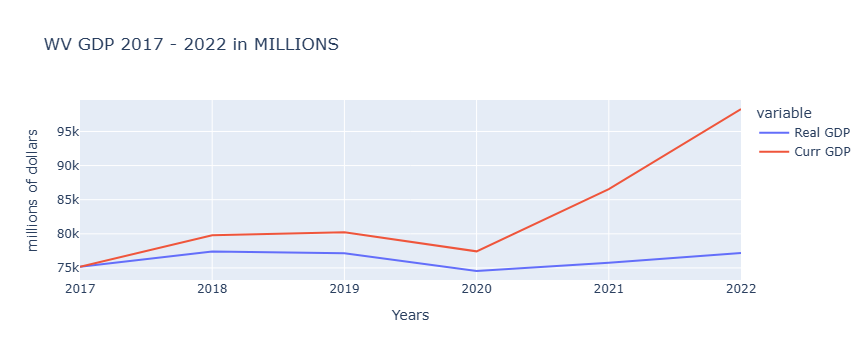

In [5]:
wbars.show_real_nom_gdp()

"Real" GDP is GDP adjusted for inflation. These adjustments must account for dependencies and weightings of price changes whose rates vary across commodities. What "basket" of goods or services, for example, are best to give the most representative picture of inflation across the entire economy? Economies are dynamic, if not actually living, entities. This keeps the economists and statisticians tuning the contents and optimal  weights of the baskets busy!

 "Current-dollar" GDP reflects the market value of "a basket" of goods and services at the prices of the period in which they were produced, including the effects of inflation. In contrast, real GDP is adjusted to remove the effects of inflation, allowing for accurate comparisons of economic output over time by using prices from a fixed base year and comparable "baskets" of goods and services.

Here, the dollar values for "Real dollar" are based on "chained 2017 dollars", meaning that figures for each year have been adjusted relative to 2017 price levels, in sequence, so that yearly interval changes reflect actual inflation increments or declines. This draws a more accurate picture overall, but you cannot exactly just add and subtract or sum the derived values in the ordinary way.

As of 2022, West Virgnia finally recovered production to its 2018 level, showing the damage inflicted by the pandemmic.The impact of inflation on producers was and severe, and still persists at higher rates than West Virginia worker income raises. There are two initial suspects for why inflation persists so strongly.

1. Monopolization in energy (coal, gas for WV) has kept prices higher longer.
2. Health care dominates non-energy sectors of the WV GDP. Health care, for comparable private monopolization reasons, suffers from high inflation nationwide.

Note that the wide gap between current **and** (still rising, from the pandemic recovery) real GDP in West Virginia suggests an **ability** of energy related industries -- the most profitable -- to pass on supply chain inflation in costs to consumers is due to monopoly positions of major energy firms.

##  West Virginia Production and Employment  by Industry

2022 is the latest year, at this writing, for which the BEA has comprehensive regional GDP reports. GDP is rising. The state economy -- from the standpoint of tradable or "exportable" wealth -- is still concentrated in energy and natural resources.

To save chart space the industrial classification descriptions are abbreviated in the chart. A concordance can be found below.

### Long/Short Industrial Classification Description Concordnce

In [11]:
mgr = DCLs.gdp_mgr

class CC:

    def get_df(lcxx: LCX ):
        index1 = lcxx.get_longs().index
        shorts = list(lcxx.get_shorts().apply(str))
        longs = list(lcxx.get_longs().apply(str))
        assert(len(shorts) == len(longs)) 
        d = {"Long Industry Desc.": longs, "Short Industry Desc.": shorts}
        df = pd.DataFrame(data= d, index=index1)

        return df

lcx = mgr.lcx
con_df = CC.get_df(lcx)

In [12]:
def show_desc_ls_table(dff):
    import plotly.graph_objects as go

    fig = go.Figure(data=[go.Table(
        header=dict(
            values=["Long Descriptions", "Short Descriptions"],
            fill_color='paleturquoise',
            align='center',
            # Set the font color for the header
            font=dict(color='darkblue', size=14) 
        ),
        cells=dict(
            values=[dff['Long Industry Desc.'], dff['Short Industry Desc.']],
            fill_color='burlywood',
            align='center',
            font=dict(color='black', size=12) 
        )
    )])

    fig.show()

In [13]:
show_desc_ls_table(con_df)

##  WV Real and Current Dollar GDP for 2022 by Industrial Sector

There are some immediate observations from the West Virginia GDP (Gross Domestic Product) graphs.


*  These charts are rank economic sectors by contribution to GDP.
*  Government, mining, health care service, real estate, manufacturing, and retail make the greatest contributions to West Virginia GDP.
*  However, of these, only mining and manufacturing contribute enough, or are profitable enough, to be subject to increased taxation. This is due to the fact they are *exporting* (out of state), and thus the tax on them is not a "zero sum gain" tax where the same sum of money is just being redirected.
*  Government, obviously, cannot be taxed.
*  Private health care services are subject to taxation, but they also benefit from substantial subsidies. Taxing private health care further makes little sense from a revenue standpoint.
*  Retail trade is already subject to significant tax, which, is typically paid by working class consumers, who, in West Virginia, cannot afford further taxation without feeling aggrieved.
*  Real estate is also already subject to significant taxation. It is worth noting that in real estate "surpluses" generally refer to *economic rents*, the excess income a property generates beyond the owner's costs and typical market returns. In GDP tables the reported high real estate surpluses may be due to ["imputed rent"](https://en.wikipedia.org/wiki/Imputed_rent). "Imputed rent" is a economic concept that "measures the benefit homeowners receive from living in their own property rent-free" .

Recent deals announced for massive data centers in parts of the state could change the size of the "Utilities" sector significantly.

In richer states investments in education, including strategic economic development around university centers, were major factors in growth, innovation, and attracting skilled and unskilled labor.  These centers can become engines of growth, but also require careful and committed planning and combined public and private investment.

Conclusions: There is a very narrow range of options available to West Virginia to lift up its people. For example, when looking at the raw numbers, consider that simply eliminating the wage difference between West Virginia teachers and teachers in bordering counties of Virginia, Maryland and Pennsylvania would cost half a billion dollars year in WV.

In [14]:
wbars.show_real_2022_gdp()

##  Current Dollar GDP by Industrial Sector

In [ ]:
wbars.show_curr_2022_gdp()

##  West Virginia Employment 2022 by Industry

Where do West Virginians work? Who employs them?

This chart ranks the economic sectors by number of employees.

In [1]:
opps.show_employment_2022_by_industry(taxable=False)

NameError: name 'opps' is not defined

This bar chart tells a lot of stories!

* Perhaps the most surprising one is the tall bar on the right, labelled "Government". There are 19 distinct industrial classifications among the 23 listed on the x axis. Note that "Government" *includes* "State" and "Federal civilian" and "Military" for local interest purposes. Still -- the relatively large size of public sector employment alongside poverty and low overall GDP asks big questions about the allocation of resources. West Virginia receives more federal subsidies and investment than it pays in federal taxes. Where do, or can, the additional funds required to raise up education and erase poverty come from?

* Non-farm proprietorships -- anyone with a small business license or partnership. It is not unusual in rural areas for this number to be high. Note that this does not appear in the GDP chart, since the proprietorships span across many economic sectors. Nonetheless, it is evidence that the "small business mentality" can be sustained even with near povery incomes.

* Also eye-catching is the size of the health care workforce. There is both a demand, and supply, story there in West Virginia history, especially the struggles of the United Mine Workers of America, for the "[best health coverage in the world](https://umwa.org/about/leadership/cecil-e-roberts/)" in the nation's most dangerous occuations.

* There is also the story of failures to economically diversify -- to do a "Norway", i.e. "more socialism", with the wealth of natural resources, or something comparable.

* Further it is useful to take note of the division of labor occupations across service and productive sectors. A principle feature of social class is one's relationship to work. Distictions between service and productive labor can be overdone. After all, wages, benefits, safety, fair treatment are common to labor organizing regardless. However, there ARE important differences, as anyone familiar with union organizing knows. There are also important differences in the accumulation of wealth.

* Empowering service workers with more economic influence over their working lives may be the single biggest organizational challenge for US labor. In the chart above, Forestry, Utilties, Mining, Construction, and Manufacturing are productive, approx 150,000 workers.  Some would include transport in the production category. The rest are service oriented, over 600,000.  Current technological trends argue that automation and AI will continue to displace existing occupations in both production and services.



The compensation chart tells that story.

##  West Virginia Compensation 2022

In [ ]:
opps.show_compensation_2022_by_industry(taxable=False)

The compensation values in this chart are gross numbers, embracing hourly, salary and managerial occupations, full AND part-time. You can divide these values by the employment numbers and get a *very rough* idea of average compensation by industry, although the distictions by class, hours and role are lost in the BEA data on employment. Observe how Utilities, Mining, Construction and Manufacturing all moved up in scale from the Employment chart. This reflects the higher compensation per worker in these sectors.

##  Operational Surplus

The a virtue of BEA data is that it gives both Operational Surplus, and wage/salary compensation values for comparison by economic sector, state, or regions, or nationally.

Operational surplus is not only profits. It includes all income *other than* compensation (and after other input costs of materials, supplies contracted services, etc., are covered). Profits, interest/debts, *and* rents are included in "operational surplus". The surpluses in tradable goods
in mining, manufacturing and real estate (a special case, as noted above) blowout everything else.

When looking at surplus relative to compensation, the level of monopolization (or 'oligarchy') permits passing on inflation costs to consumers. For example when the pandemic and the Ukraiine war slowed down supply chains in energy, the giant oil firms profits did not slip.

In [ ]:
opps.show_opp_surplus_2022()

##  Operational Surplus and Compensation by Industry

This chart is not ranked

The chart below shows who is making money by industry.


    Several key trends characterize the relationship between US manufacturing operational surplus and compensation:

* Declining Labor Share: The portion of manufacturing output flowing to workers as compensation (the labor share) has been decreasing over time.
* Growing Profit Share: Conversely, corporate profits in manufacturing (a component of operating surplus) have grown substantially faster than employee compensation in recent decades.
* Eroding Compensation Premium: While manufacturing workers generally earn more in hourly compensation (wages and benefits) compared to similar workers in other private sector roles, this premium has shrunk since the 1980s.

*Reasons for these trends include:*

* Lower Manufacturing Wages: Workers directly employed by manufacturing firms are receiving lower hourly wages compared to previous decades.
* Increased Use of Staffing Agencies: A growing portion of manufacturing jobs are filled by workers from staffing and temporary help agencies, who tend to be paid less than directly employed workers.
* Declining Unionization and Bargaining Power: Erosion of labor's bargaining power due to political and legal repression.

In [ ]:
opps.show_comp_surp_bars()

##  TAXATION - SUBSIDIES

The combination of state taxation and subsidies effecting each industrial sector reflects the state's "industrial policy" -- what it is encouraging or discouraging with incentives or disincentives. Retail and Mining stand out as tax-paying.

In [ ]:
tsbars.show_taxes_bars()

### SUBSIDIES

The heavy subsides to health care and real estate diminish their roles in accounting for their role in overall GDP for the state.

In [ ]:
tsbars.show_subs_bars()

## Taxes Minus Subsidies by Industry

Separating out the Subsidized from the Taxable, yields the picture of who is really shouldering the industry tax burdens in the state. Mining, and the consumer (Retail, sales).

In [ ]:
tsbars.show_tax_minus_subs_bars()

There are many unanswered questions that arise from this data. However, the energy concentrated structure of